<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2021/blob/main/%20ColabNotebooks/practice_05_reg_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 5: Regulation and Tracking**
## **Goals for today**

---



During today practice we will:
- Recall the pole placement and root locus techniques
- Solve the regulation and tracking problems



### **Linear State Feedback**

Recall the linear system in state space form:
\begin{equation}
\mathbf{\dot{x}}=\mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u}
\end{equation}

The general form of feedback that may stabilize our system is know to be linear:
\begin{equation}
\mathbf{u}=-\mathbf{K}\mathbf{x}
\end{equation}

Substitution to the system dynamics yields:
\begin{equation}
\mathbf{\dot{x}}=(\mathbf{A} - \mathbf{B}\mathbf{K})\mathbf{x} = \mathbf{A}_c\mathbf{x}
\end{equation}
Thus the stability of the controlled system is completely determined by the eigen values of $\mathbf{A}_c$ and consequantially by the matrix $\mathbf{K}$


### **Pole Placement**

There is a technique for finding suitable $\mathbf{K}$ matrix that would produced desired eigenvalues of the $\mathbf{A}_c$ system. It is called pole placement.

Watch the intoduction to pole placement for self-study: [link](https://www.youtube.com/watch?v=FXSpHy8LvmY&ab_channel=MATLAB). Notice the difference between the approach to "steady state" control design show there, and in the lecture.

In [ ]:
import numpy as np
from numpy.linalg import eig
from scipy.signal import place_poles

A = np.array([[0, 0], 
              [0, -1]])

B = np.array([[1], 
              [1]])

#desired eigenvalues
poles = np.array([-10-1j, -10+1j])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

K: [[101. -82.]]
eigenvalues of A - B*K: [-10.+1.j -10.-1.j]


### **Exercise:**
Make the follwing systems Lyapunov and asymptotically stable. 
$$\dot x = 
\begin{bmatrix} 10 & 0 \\ -5 & 10
\end{bmatrix}
x
+
\begin{bmatrix} 
2 \\ 0
\end{bmatrix}
u
$$

$$\dot x = 
\begin{bmatrix} 2 & 2 \\ -6 & 10
\end{bmatrix}
x
+
\begin{bmatrix} 
0 & -1 \\ 5 & -1
\end{bmatrix}
u
$$

Give example of an unstable system of the form $\mathbf{\dot{x}}=\mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u}$ that can't be stabilized



### **Root Locus**

Consider the following question: given system $\dot{\mathbf{x}} = \mathbf{A}\mathbf{x}+\mathbf{B}\mathbf{u}$ and control $\mathbf{u} = 
-\mathbf{K} \mathbf{x}$, how does the change in $\mathbf{K}$ changes the eigenvalues of theresulting matrix $\mathbf{A} - \mathbf{B}\mathbf{K}$?

Root locus method is drawing the graph of eigenvalues of the matrix $\mathbf{A} - \mathbf{B}\mathbf{K}$ for a given change of matrix $\mathbf{K}$ . We only vary a single component of $\mathbf{K}$ , so the result is a line.

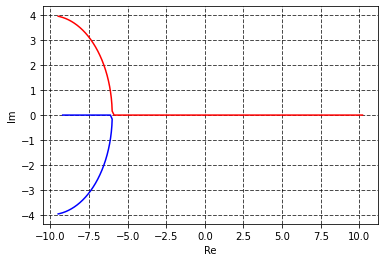

In [ ]:
import matplotlib.pyplot as plt

A = np.array([[1, -7], [2, -10]])
B = np.array([[1], [0]])
K0 = np.array([[1., 1.]])

k_min = -10;
k_max = 10;
k_step = 0.01;

Count = int(np.floor((k_max-k_min)/k_step))

k_range = np.linspace(k_min, k_max, Count)
E = np.zeros((Count, 4))

for i in range(Count):
    K0[0, 0] = k_range[i]
    ei, v = eig((A - B.dot(K0)))

    E[i, 0] = np.real(ei[0])
    E[i, 1] = np.imag(ei[0])
    E[i, 2] = np.real(ei[1])
    E[i, 3] = np.imag(ei[1])

    #print("eigenvalues of A - B*K:", ei)


plt.plot(E[:, 0], E[:, 1], color = 'r')
plt.plot(E[:, 2], E[:, 3], color = 'b')
plt.xlabel(r'Re')
plt.ylabel(r'Im')
plt.ylim()
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.show()


## **Regulation**

In some practical problems we are always want to move our system not to the some equalibrium but to the **desired point** $\mathbf{x}_d$, and stay there ($\mathbf{\dot{x}}_d = \mathbf{0}$). To do so one may consider the change of variables: 
\begin{equation}
\mathbf{\tilde{x}} = \mathbf{x}_d - \mathbf{x} 
\end{equation}


<p><img alt="ff_fb" height="150px" src="https://drive.google.com/uc?id=1E4tNt0rSwXsrGSi4U1cOk0D_Y-q8bFJ-" align="center" hspace="230px" vspace="0px"></p>

For instance applying the full state feedback in the new variables yields:
\begin{equation}
\mathbf{u} = \mathbf{K}\mathbf{\tilde{x}} + \mathbf{u}_d
\end{equation}

where following holds $\mathbf{A}\mathbf{x}_d + \mathbf{B}\mathbf{u}_d=\mathbf{0}$

Thus transforming problem back to the stabilization of new variables $\mathbf{\tilde{x}}$ (control error):
\begin{equation}
\dot{\tilde{\mathbf{x}}}=(\mathbf{A} - \mathbf{B}\mathbf{K})\tilde{\mathbf{x}}
\end{equation}


### **Example:**

Given system:

$$\dot x = 
\begin{bmatrix} 10 & 5 \\ -5 & -10
\end{bmatrix}
x
+
\begin{bmatrix} 
-1 \\ 2
\end{bmatrix}
u
$$

let us drive it towards the point $x_d = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$



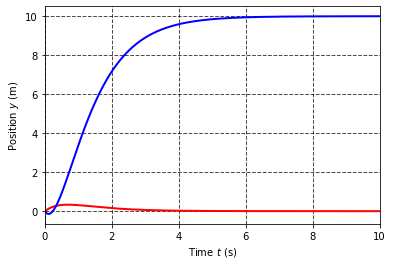

In [ ]:
import numpy as np
from scipy.integrate import odeint

def system_ode(x, t, A, B, K, x_d, u_d):
    x_e = x_d - x 
    u = np.dot(K,x_e) + u_d
    dx = np.dot(A,x) + np.dot(B,u)
    return dx


t0 = 0 # Initial time 
tf = 10 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
y_0 = 0.5
x0 = [0, 0] # Set initial state 

A = [[10, 5], 
     [-5, -10]]

B = [[-1], 
     [2]]

c = 10
x_d = [0, c]
u_d = 5*c
K = [[-13.26666667,  -5.13333333]]



x_sol = odeint(system_ode, x0, t, args=(A, B, K,x_d, u_d )) # integrate system "sys_ode" from initial state $x0$

from matplotlib.pyplot import *

plot(t, x_sol[:,0], 'r', linewidth=2.0)
plot(t, x_sol[:,1], 'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Position ${y}$ (m)')
xlabel(r'Time $t$ (s)')
show()

## **Tracking**
In case of tracking a desired signal is given by function of time $\mathbf{x}_d(t)$, thus $\dot{\mathbf{x}}_d \neq \mathbf{0}$ and in order to calculate feedforward one should be able to solve:
\begin{equation}
\dot{\mathbf{x}}_d = \mathbf{A}\mathbf{x}_d + \mathbf{B}\mathbf{u}_d
\end{equation}

Then applying control law:
\begin{equation}
\mathbf{u} = \mathbf{K}\mathbf{\tilde{x}} + \mathbf{u}_d
\end{equation}

yields:
\begin{equation}
\dot{\tilde{\mathbf{x}}}=(\mathbf{A} - \mathbf{B}\mathbf{K})\tilde{\mathbf{x}}
\end{equation}

In [ ]:
# CODE FOR TRACKING PROBLEM

### **Bonus: Frequency responce**


Simulate the equations of DC motor for a sinusoidal input voltage $V = A \sin\omega t$ and analyze responce in angle $\theta$.

How does the choice of $\omega$ affects the result?

Watch [video](https://youtu.be/bU7y051Ejgw) on "frequency responce" and find how you could use the proposed method to analyse the effect of $\omega$ in your problem.

**Note:** To plot the frequancy rersponce it is convinient to use   ```scipy.signal.ss2tf``` and ```scipy.signal.freqz```

